In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<Axes: title={'center': 'Class Distribution'}, xlabel='Class'>

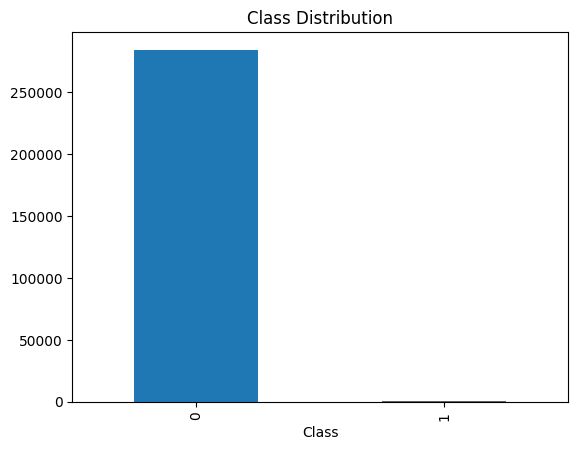

In [4]:
df['Class'].value_counts().plot(kind='bar', title='Class Distribution')

In [5]:
import seaborn as sns

<Axes: xlabel='Amount', ylabel='Count'>

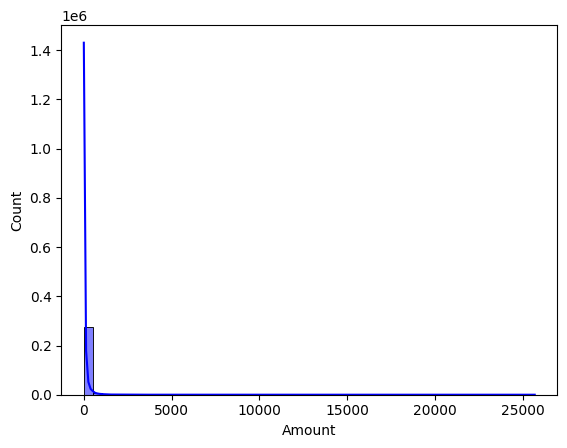

In [6]:
sns.histplot(df['Amount'], bins=50, color='blue', edgecolor='black', kde=True)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [8]:
X = df.drop('Class', axis=1)
y = df['Class']

In [9]:
X_scaled = scaler.fit_transform(X)

In [10]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Random Under Sampling

In [11]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_train_undersampled, y_train_undersampled = rus.fit_resample(X_train, y_train)

print(f"Original dataset shape: {y_train.value_counts()}")
print(f"Resampled dataset shape: {y_train_undersampled.value_counts()}")

Original dataset shape: Class
0    227451
1       394
Name: count, dtype: int64
Resampled dataset shape: Class
0    394
1    394
Name: count, dtype: int64


Random Over Sampling

In [12]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_train_oversampled, y_train_oversampled = ros.fit_resample(X_train, y_train)

print("Original dataset shape: ", y_train.value_counts())
print("Resampled dataset shape: ", y_train_oversampled.value_counts())

Original dataset shape:  Class
0    227451
1       394
Name: count, dtype: int64
Resampled dataset shape:  Class
0    227451
1    227451
Name: count, dtype: int64


SMOTE (Synthetic Minority Over-Sampling Technique)

In [13]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Original dataset shape: ", y_train.value_counts())
print("Resampled dataset shape: ", y_train_smote.value_counts())

Original dataset shape:  Class
0    227451
1       394
Name: count, dtype: int64
Resampled dataset shape:  Class
0    227451
1    227451
Name: count, dtype: int64


Tomek Link

In [14]:
from imblearn.under_sampling import TomekLinks
tomek = TomekLinks()
X_train_tomek, y_train_tomek = tomek.fit_resample(X_train, y_train) 

print("Original dataset shape: ", y_train.value_counts())
print("Resampled dataset shape: ", y_train_tomek.value_counts())

Original dataset shape:  Class
0    227451
1       394
Name: count, dtype: int64
Resampled dataset shape:  Class
0    227434
1       394
Name: count, dtype: int64


SMOTE-Tomek

In [15]:
from imblearn.combine import SMOTETomek
smote_tomek = SMOTETomek(random_state = 42)
X_train_smote_tomek_sampled, y_train_smote_tomek_sampled = smote_tomek.fit_resample(X_train, y_train)

print("Original dataset shape : ", y_train.value_counts())
print("Resampled dataset shape : ", y_train_smote_tomek_sampled.value_counts())

Original dataset shape :  Class
0    227451
1       394
Name: count, dtype: int64
Resampled dataset shape :  Class
0    227451
1    227451
Name: count, dtype: int64


Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

def evaluate_model(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print(f"F1 Score: {f1_score(y_test, y_pred)}")
    print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred)}")



In [17]:
print("Evaluating model on original dataset:")
evaluate_model(X_train, y_train, X_test, y_test)

Evaluating model on original dataset:
Precision: 0.8636363636363636
Recall: 0.5816326530612245
F1 Score: 0.6951219512195121
ROC AUC Score: 0.7907371903460314


In [18]:
print("Evaluation model on Undersampled dataset")
evaluate_model(X_train_undersampled, y_train_undersampled, X_test, y_test)

Evaluation model on Undersampled dataset
Precision: 0.039912280701754385
Recall: 0.9285714285714286
F1 Score: 0.07653490328006729
ROC AUC Score: 0.9450380356137954


In [19]:

print("Evaluating model on Oversampled dataset:")
evaluate_model(X_train_oversampled, y_train_oversampled, X_test, y_test)

Evaluating model on Oversampled dataset:
Precision: 0.06258692628650904
Recall: 0.9183673469387755
F1 Score: 0.1171875
ROC AUC Score: 0.9473308316010703


In [20]:
print("Evaluating model on SMOTE dataset:")
evaluate_model(X_train_smote, y_train_smote, X_test, y_test)

Evaluating model on SMOTE dataset:


Precision: 0.058900523560209424
Recall: 0.9183673469387755
F1 Score: 0.11070110701107011
ROC AUC Score: 0.9465394697552627


In [21]:
print("Evaluating model on Tomek Links dataset:")   
evaluate_model(X_train_tomek, y_train_tomek, X_test, y_test)

Evaluating model on Tomek Links dataset:
Precision: 0.8484848484848485
Recall: 0.5714285714285714
F1 Score: 0.6829268292682927
ROC AUC Score: 0.7856263566203071


In [22]:

print("Evaluating model on SMOTE-Tomek dataset:")
evaluate_model(X_train_smote_tomek_sampled, y_train_smote_tomek_sampled, X_test, y_test)

Evaluating model on SMOTE-Tomek dataset:
Precision: 0.058900523560209424
Recall: 0.9183673469387755
F1 Score: 0.11070110701107011
ROC AUC Score: 0.9465394697552627


KNN

In [23]:
from sklearn.neighbors import KNeighborsClassifier

def evaluate_knn_model(X_train, y_train, X_test, y_test):
    knn_model = KNeighborsClassifier(n_neighbors=5)
    knn_model.fit(X_train, y_train)
    y_pred_knn = knn_model.predict(X_test)
    
    print(f"KNN Precision: {precision_score(y_test, y_pred_knn)}")
    print(f"KNN Recall: {recall_score(y_test, y_pred_knn)}")
    print(f"KNN F1 Score: {f1_score(y_test, y_pred_knn)}")
    print(f"KNN ROC AUC Score: {roc_auc_score(y_test, y_pred_knn)}")

In [24]:
print("Evaluating KNN model on original dataset:")
evaluate_knn_model(X_train, y_train, X_test, y_test)

Evaluating KNN model on original dataset:
KNN Precision: 0.9382716049382716
KNN Recall: 0.7755102040816326
KNN F1 Score: 0.8491620111731844
KNN ROC AUC Score: 0.887711137493827


In [25]:
print("Evaluating KNN model on Undersampled dataset:")
evaluate_knn_model(X_train_undersampled, y_train_undersampled, X_test, y_test)

Evaluating KNN model on Undersampled dataset:
KNN Precision: 0.06330935251798561
KNN Recall: 0.8979591836734694
KNN F1 Score: 0.11827956989247312
KNN ROC AUC Score: 0.937531223800719


In [26]:
print("Evaluating KNN model on Oversampled dataset:")
evaluate_knn_model(X_train_oversampled, y_train_oversampled, X_test, y_test)

Evaluating KNN model on Oversampled dataset:
KNN Precision: 0.7058823529411765
KNN Recall: 0.8571428571428571
KNN F1 Score: 0.7741935483870968
KNN ROC AUC Score: 0.9282636767425034


In [27]:
print("Evaluating KNN model on SMOTE dataset:")
evaluate_knn_model(X_train_smote, y_train_smote, X_test, y_test)

Evaluating KNN model on SMOTE dataset:
KNN Precision: 0.480225988700565
KNN Recall: 0.8673469387755102
KNN F1 Score: 0.6181818181818182
KNN ROC AUC Score: 0.9328645217231518


In [28]:
print("Evaluating KNN model on Tomek Links dataset:")
evaluate_knn_model(X_train_tomek, y_train_tomek, X_test, y_test)

Evaluating KNN model on Tomek Links dataset:
KNN Precision: 0.9390243902439024
KNN Recall: 0.7857142857142857
KNN F1 Score: 0.8555555555555555
KNN ROC AUC Score: 0.8928131783101535


In [29]:
print("Evaluating KNN model on Smote-Tomek dataset:")
evaluate_knn_model(X_train_smote_tomek_sampled, y_train_smote_tomek_sampled, X_test, y_test)

Evaluating KNN model on Smote-Tomek dataset:
KNN Precision: 0.480225988700565
KNN Recall: 0.8673469387755102
KNN F1 Score: 0.6181818181818182
KNN ROC AUC Score: 0.9328645217231518
